In [1]:
import numpy as np
import torch
from torch import nn

#Otimizador
from torch import optim

# Visualização
import matplotlib.pyplot as plt

In [2]:
args = {
    'lr': 1e-2,
    'weight_decay': 5e-2,
    'n_epochs': 1000
}

In [3]:
# Dado de treino
data = [[0], [1], [2]]
resposta = [0, 2, 4]

data_tensor = torch.Tensor(data)
print(data_tensor)
resposta_tensor = torch.Tensor(resposta)
print(resposta_tensor)

tensor([[0.],
        [1.],
        [2.]])
tensor([0., 2., 4.])


In [4]:
class SignalClassifier(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(SignalClassifier, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size, bias=True)

    def forward(self, X):
        output = self.hidden(X)
        weight_output = self.hidden.weight
        bias_output = self.hidden.bias

        return output, weight_output, bias_output


In [5]:
# Instanciando a rede e configurando os tamanhos da camada de entrada e saída
input_size = 1
hidden_size = 1

net = SignalClassifier(input_size, hidden_size)

In [6]:
# Instanciando a função de perda: L1Loss (Erro médio absoluto)
criterion = nn.L1Loss()

In [7]:
# Instanciando o otimizador: Adam
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [8]:
pesos = torch.Tensor([])
bias =  torch.Tensor([])
perdas = []

def train(data_input, data_response, perdas, pesos, bias):
    # Forward
    pred, weight_pred, bias_pred = net(data_tensor) # Treinando o modelo
    loss = criterion(pred.view(len(data_tensor)), resposta_tensor) # Cálculo do erro (perda)

    perdas = np.append(perdas,loss.data.numpy())
    pesos = torch.concat((pesos,weight_pred))
    bias = torch.concat((bias,bias_pred))

    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return perdas, pesos, bias

In [9]:
for i in range(args['n_epochs']):
    perdas, pesos, bias = train(data_input=data_tensor, data_response=resposta_tensor, perdas=perdas, pesos=pesos, bias=bias)

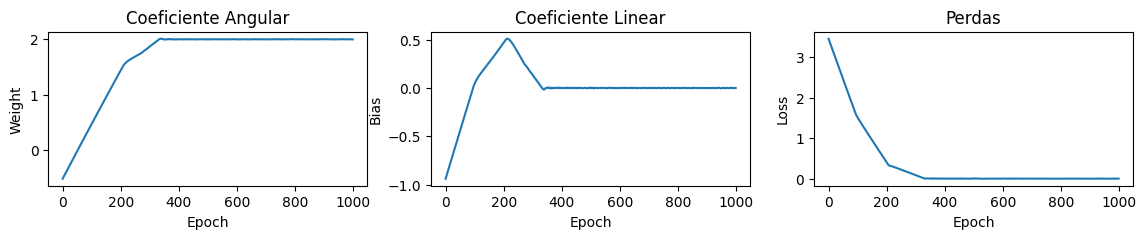

In [10]:
dados_pesos_plot = pesos[:,0].data.numpy()
dados_bias_plot = bias.data.numpy()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,2))

ax1.set(xlabel='Epoch', ylabel='Weight', title='Coeficiente Angular')
ax1.plot(dados_pesos_plot)

ax2.set(xlabel='Epoch', ylabel='Bias', title='Coeficiente Linear')
ax2.plot(dados_bias_plot)

ax3.set(xlabel='Epoch', ylabel='Loss', title='Perdas')
ax3.plot(perdas)